In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../data/" directory

import os
import os.path as osp

ds_name = 'TB'
ds_folder = f'/mnt/data2/chaoyue/data/cleaned_data'
for dirname, _, filenames in os.walk(ds_folder):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/mnt/data2/chaoyue/data/cleaned_data/cleaned_resp_edge.csv
/mnt/data2/chaoyue/data/cleaned_data/cleaned_TB_node.csv
/mnt/data2/chaoyue/data/cleaned_data/cleaned_TB_edge.csv
/mnt/data2/chaoyue/data/cleaned_data/cleaned_resp_node.csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
#import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import skew, norm
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing
%matplotlib inline

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [3]:
#Import the files
node_df = pd.read_csv(f'{ds_folder}/cleaned_{ds_name}_node.csv')
edge_df = pd.read_csv(f'{ds_folder}/cleaned_{ds_name}_edge.csv')

In [4]:
# change the dynamic of background nodes to bg
impute_node = np.where(node_df['cluster_id']=='Background')
node_df = node_df.reset_index(drop=True)
node_df.loc[(impute_node[0]),'dynamic']='bg'
node_df

,sim,cluster_id,state,dynamic,dynamic_rparam,v_sampling_fraction,v_cluster_size,v_fraction_state,v_timespan,gamma,oster,PD,R0,abs_growth_rate,fraction_time_growth,r_max,ltt_shape,cherries,BLD,date,node
0,10000.0,Background,A,bg,0.000000,1630.56000,1630.0,1.0,200.0,-92.407847,200.001471,25961.0,0.245422,141.319483,0.484848,7663.879785,convex_concave,0.281078,1.0,2020-02-04,3.0
1,10000.0,Background,A,bg,0.000000,1630.56000,1630.0,1.0,200.0,-92.407847,200.001471,25961.0,0.245422,141.319483,0.484848,7663.879785,convex_concave,0.281078,1.0,2020-01-23,1.0
2,10000.0,Background,A,bg,0.000000,1630.56000,1630.0,1.0,200.0,-92.407847,200.001471,25961.0,0.245422,141.319483,0.484848,7663.879785,convex_concave,0.281078,1.0,2020-01-30,2.0
3,10000.0,Background,A,bg,0.000000,1630.56000,1630.0,1.0,200.0,-92.407847,200.001471,25961.0,0.245422,141.319483,0.484848,7663.879785,convex_concave,0.281078,1.0,2020-02-04,4.0
4,10000.0,Background,A,bg,0.000000,1630.56000,1630.0,1.0,200.0,-92.407847,200.001471,25961.0,0.245422,141.319483,0.484848,7663.879785,convex_concave,0.281078,1.0,2020-03-09,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20678373,99.0,c3,E,decay,0.000345,0.49483,394.0,1.0,46.0,-16.378858,46.008649,224.0,2.300658,2.089202,0.045455,42.959823,convex,0.181818,3.0,2020-06-05,791.0
20678374,99.0,c3,E,decay,0.000345,0.49483,394.0,1.0,46.0,-16.378858,46.008649,224.0,2.300658,2.089202,0.045455,42.959823,convex,0.181818,3.0,2020-06-17,991.0
20678375,99.0,c3,E,decay,0.000345,0.49483,394.0,1.0,46.0,-16.378858,46.008649,224.0,2.300658,2.089202,0.045455,42.959823,convex,0.181818,3.0,2020-06-17,1139.0
20678376,99.0,c3,E,decay,0.000345,0.49483,394.0,1.0,46.0,-16.378858,46.008649,224.0,2.300658,2.089202,0.045455,42.959823,convex,0.181818,3.0,2020-06-01,2925.0


In [5]:
edge_df

,from,to,weight1,weight2,sim
0,1724,3,24,0.019774,10000
1,1724,1725,11,0.009048,10000
2,1725,1,1,0.000827,10000
3,1725,1726,7,0.006317,10000
4,1726,2,1,0.000840,10000
...,...,...,...,...,...
20671950,3449,1387,14,0.011984,99
20671951,3449,1820,14,0.013192,99
20671952,3431,3450,40,0.039586,99
20671953,3450,146,2,0.001946,99


In [6]:
print('Shape of node data is', node_df.shape)
print ('Shape of edge data is', edge_df.shape)

Shape of node data is (20678378, 21)
Shape of edge data is (20671955, 5)


In [7]:
#information about the node data set
edge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20671955 entries, 0 to 20671954
Data columns (total 5 columns):
 #   Column   Dtype  
---  ------   -----  
 0   from     int64  
 1   to       int64  
 2   weight1  int64  
 3   weight2  float64
 4   sim      int64  
dtypes: float64(1), int64(4)
memory usage: 788.6 MB


In [8]:
edge_df.describe()

,from,to,weight1,weight2,sim
count,2.067196e+07,2.067196e+07,2.067196e+07,2.067196e+07,2.067196e+07
mean,2.543060e+03,1.662017e+03,8.998144e+00,8.098526e-03,5.010864e+03
std,5.246970e+02,9.800511e+02,7.739374e+00,6.999575e-03,2.894437e+03
min,3.300000e+01,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,2.146000e+03,8.110000e+02,3.000000e+00,2.440526e-03,2.487000e+03
50%,2.553000e+03,1.643000e+03,8.000000e+00,6.884525e-03,5.008000e+03
75%,2.966000e+03,2.500000e+03,1.300000e+01,1.143960e-02,7.504000e+03
max,3.900000e+03,3.900000e+03,2.140000e+02,1.986355e-01,1.000000e+04


### Count number of trees

In [9]:
node_tree_ids = node_df['sim'].unique()
edge_tree_ids = edge_df['sim'].unique()
assert len(node_tree_ids) == len(edge_tree_ids), f'Node: {len(node_tree_ids)}, {len(edge_tree_ids)}'

num_trees = len(node_tree_ids)
tree_ids = node_tree_ids
print(f'Number of trees: {num_trees}')

Number of trees: 6423


### Analysis the edge weights

In [10]:
aly_edge_feat_cols = ['weight1', 'weight2']
aly_edge_df = edge_df[aly_edge_feat_cols]

In [11]:
aly_edge_df.describe()

,weight1,weight2
count,2.067196e+07,2.067196e+07
mean,8.998144e+00,8.098526e-03
std,7.739374e+00,6.999575e-03
min,0.000000e+00,0.000000e+00
25%,3.000000e+00,2.440526e-03
50%,8.000000e+00,6.884525e-03
75%,1.300000e+01,1.143960e-02
max,2.140000e+02,1.986355e-01


array([[<AxesSubplot:title={'center':'weight1'}>,
        <AxesSubplot:title={'center':'weight2'}>]], dtype=object)

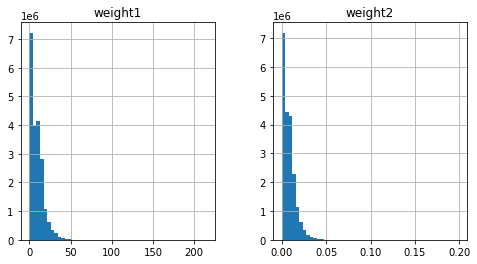

In [12]:
aly_edge_df.hist(bins=50,figsize=(8,4))

In [13]:
# Compute pairwise correlation of columns (pearson R: standard correlation coefficient)
aly_edge_df.corr()

,weight1,weight2
weight1,1.000000,0.995199
weight2,0.995199,1.000000


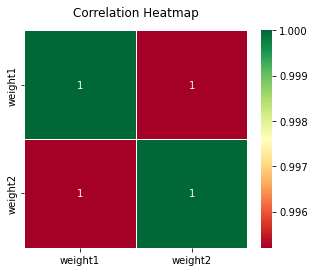

In [14]:
# Pearson Correlation Matrix

# Increase the size of the heatmap.
plt.figure(figsize=(5, 4))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(aly_edge_df.corr(), annot=True, linewidths=.5, cmap="RdYlGn")
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', pad=14);

### Get the node and edge distribution of the trees

In [15]:
node_tree_ids = node_df['sim'].unique()
edge_tree_ids = edge_df['sim'].unique()
assert len(node_tree_ids) == len(edge_tree_ids), f'Node: {len(node_tree_ids)}, {len(edge_tree_ids)}'

num_trees = len(node_tree_ids)
tree_ids = node_tree_ids
print(f'Number of trees: {num_trees}')

Number of trees: 6423


In [16]:
from collections import defaultdict

tree_dist_dict = defaultdict(list)

for tree_id in tree_ids:
    tree_dist_dict['sim'].append(tree_id)
    onetree_node_df = node_df[node_df['sim'] == tree_id] 
    num_nodes = onetree_node_df.shape[0]
    tree_dist_dict['num_nodes'].append(num_nodes)
    
    num_background_nodes = onetree_node_df[onetree_node_df['cluster_id']=='Background'].shape[0]
    tree_dist_dict['num_background_nodes'].append(num_background_nodes)
    tree_dist_dict[f'rat_background_nodes'].append(num_background_nodes / num_nodes)
    
    for label in ['static', 'growth', 'decay']:
        num_label_nodes = onetree_node_df[onetree_node_df['dynamic']==label].shape[0]
        tree_dist_dict[f'num_{label}_nodes'].append(num_label_nodes)
        tree_dist_dict[f'rat_{label}_nodes'].append(num_label_nodes / num_nodes)
        
    onetree_edge_df = edge_df[edge_df['sim'] == tree_id]
    # print(onetree_edge_df.shape)
    tree_dist_dict['num_edges'].append(onetree_edge_df.shape[0])
    
tree_dist_df = pd.DataFrame.from_dict(tree_dist_dict)

array([[<AxesSubplot:title={'center':'sim'}>,
        <AxesSubplot:title={'center':'num_nodes'}>,
        <AxesSubplot:title={'center':'num_background_nodes'}>],
       [<AxesSubplot:title={'center':'rat_background_nodes'}>,
        <AxesSubplot:title={'center':'num_static_nodes'}>,
        <AxesSubplot:title={'center':'rat_static_nodes'}>],
       [<AxesSubplot:title={'center':'num_growth_nodes'}>,
        <AxesSubplot:title={'center':'rat_growth_nodes'}>,
        <AxesSubplot:title={'center':'num_decay_nodes'}>],
       [<AxesSubplot:title={'center':'rat_decay_nodes'}>,
        <AxesSubplot:title={'center':'num_edges'}>, <AxesSubplot:>]],
      dtype=object)

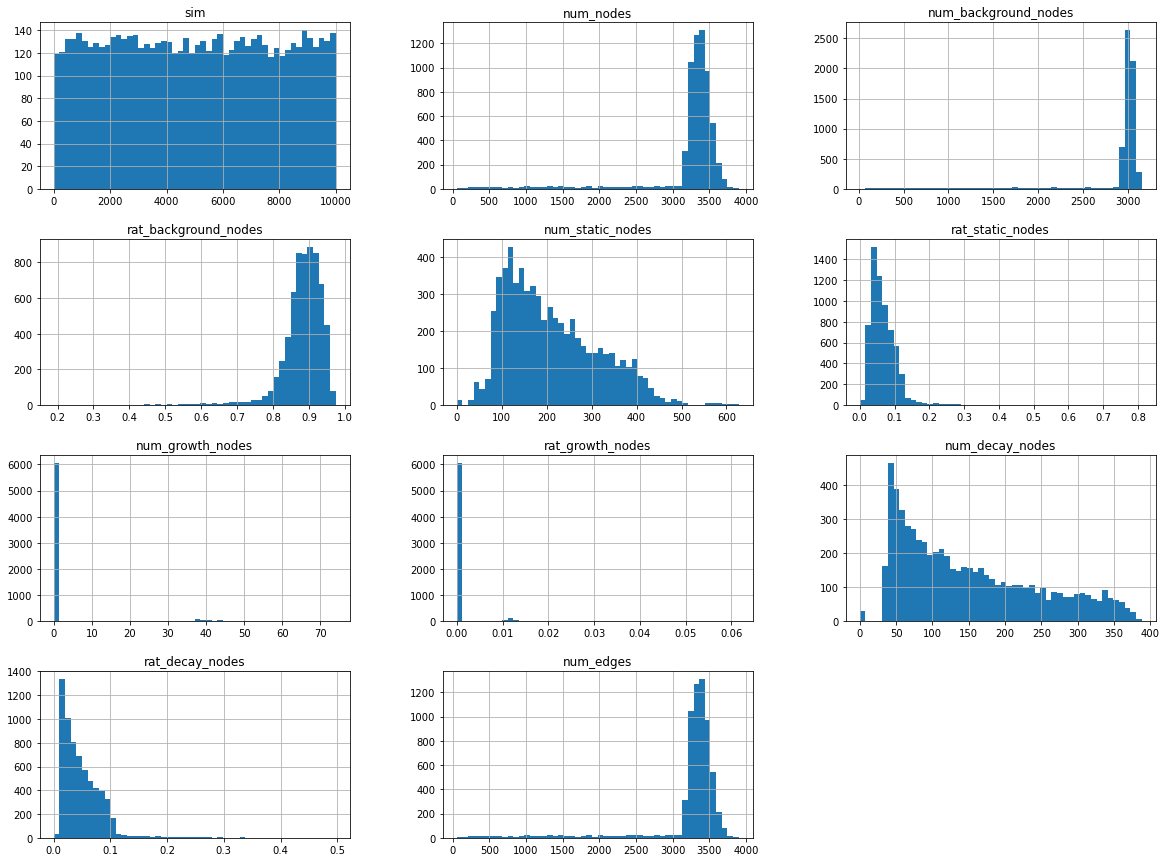

In [17]:
tree_dist_df.hist(bins=50,figsize=(20,15))

### Split the train/test sets

In [18]:
random_seed = 123
np.random.seed(random_seed)
split_folder = f'/mnt/data2/chaoyue/data/{ds_name}-classification/split_rs{random_seed}'
os.makedirs(split_folder, exist_ok=True)

from sklearn.model_selection import  train_test_split
#split the data for training and testing
train_ids, test_ids = train_test_split(tree_ids, test_size=0.2)
print(f"Train: {len(train_ids)}, Test: {len(test_ids)}")
print(test_ids[:10])

Train: 5138, Test: 1285
[3646. 9540. 5164. 1004. 8681. 4772. 4249. 4175. 3531. 4457.]


In [19]:
train_edge_df = edge_df[edge_df['sim'].isin(train_ids)]
test_edge_df = edge_df[edge_df['sim'].isin(test_ids)]

print(f'Train edges: {train_edge_df.shape[0]}')
print(f'Test edges: {test_edge_df.shape[0]}')

Train edges: 16565133
Test edges: 4106822


### Normalize the edge weights

array([[<AxesSubplot:title={'center':'weight1'}>,
        <AxesSubplot:title={'center':'weight2'}>]], dtype=object)

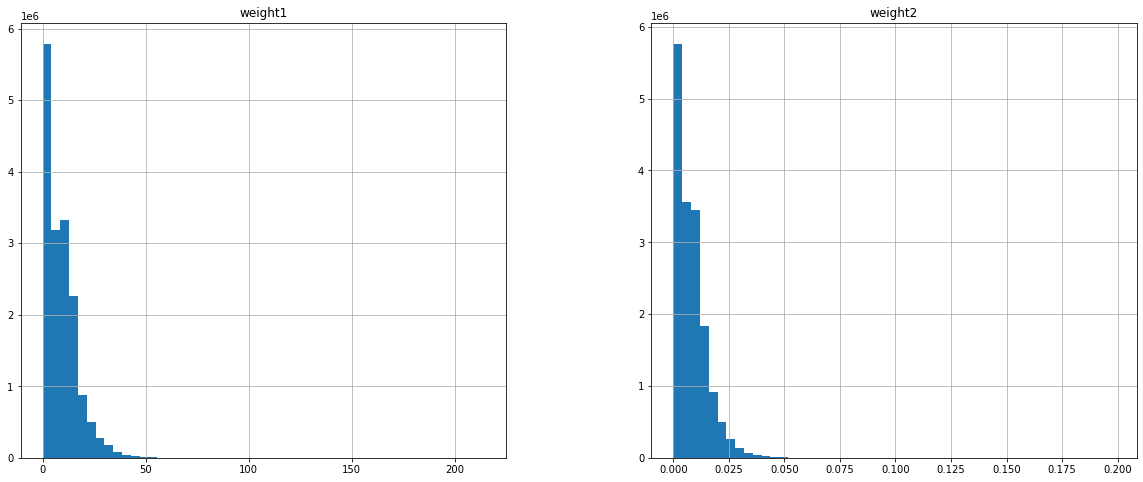

In [20]:
train_edge_df[aly_edge_feat_cols].hist(bins=50,figsize=(20,8))

/home/chaoyue/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


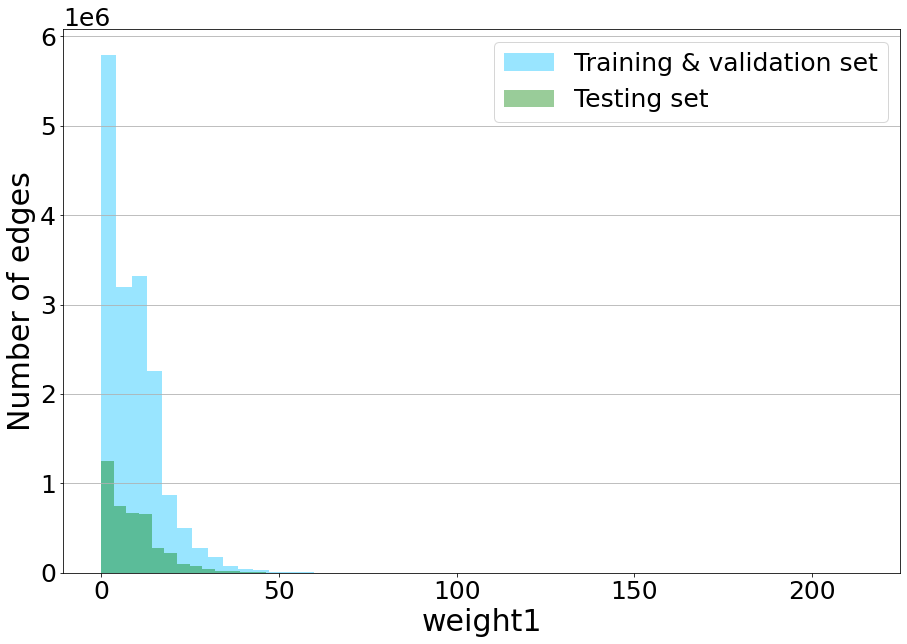

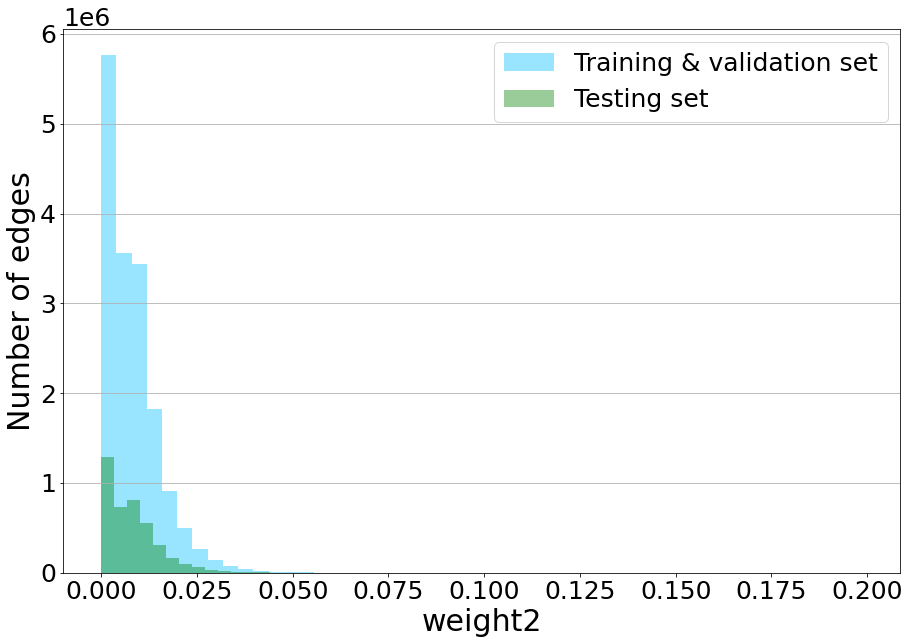

In [21]:
#generate figure plots
for feat in aly_edge_feat_cols:
    fig = plt.figure(figsize=[15,10])
    plt.rcParams.update({'font.size': 25})
    ax1 = fig.add_subplot(111)
    #ax2 = ax1.twinx()
    sns.distplot(train_edge_df[feat],hist=True,kde=False,rug=False,color='#00BFFF',label='Train & Validation Set',ax=ax1)
    sns.distplot(test_edge_df[feat],hist=True,kde=False,rug=False,color='green',label='Test Set',ax=ax1)
    #ax2.set(ylim=(0,1.1))
    ax1.axes.set_ylabel("Number of edges",fontsize=30)
    ax1.axes.set_xlabel(f"{feat}",fontsize=30)
    plt.grid(axis = "y")
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    ax1.legend(['Training & validation set','Testing set'],fontsize=25,loc=1)
    #fig.savefig(f"../paper/edge_dist/{feat}.svg",dpi=600,format='svg')

In [22]:
train_edge_df['weight1'].describe()

count    1.656513e+07
mean     8.996544e+00
std      7.737637e+00
min      0.000000e+00
25%      3.000000e+00
50%      8.000000e+00
75%      1.300000e+01
max      2.140000e+02
Name: weight1, dtype: float64

In [23]:
train_edge_df.loc[:, 'weight1_arsinh'] = np.arcsinh(train_edge_df['weight1'])

/home/chaoyue/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [24]:
train_edge_df['weight2'].describe()

count    1.656513e+07
mean     8.097205e-03
std      6.998349e-03
min      0.000000e+00
25%      2.440221e-03
50%      6.883093e-03
75%      1.143882e-02
max      1.986355e-01
Name: weight2, dtype: float64

In [25]:
train_edge_df.loc[:, 'weight2_arsinh'] = np.arcsinh(train_edge_df['weight2'])

array([[<AxesSubplot:title={'center':'weight1'}>,
        <AxesSubplot:title={'center':'weight2'}>],
       [<AxesSubplot:title={'center':'weight1_arsinh'}>,
        <AxesSubplot:title={'center':'weight2_arsinh'}>]], dtype=object)

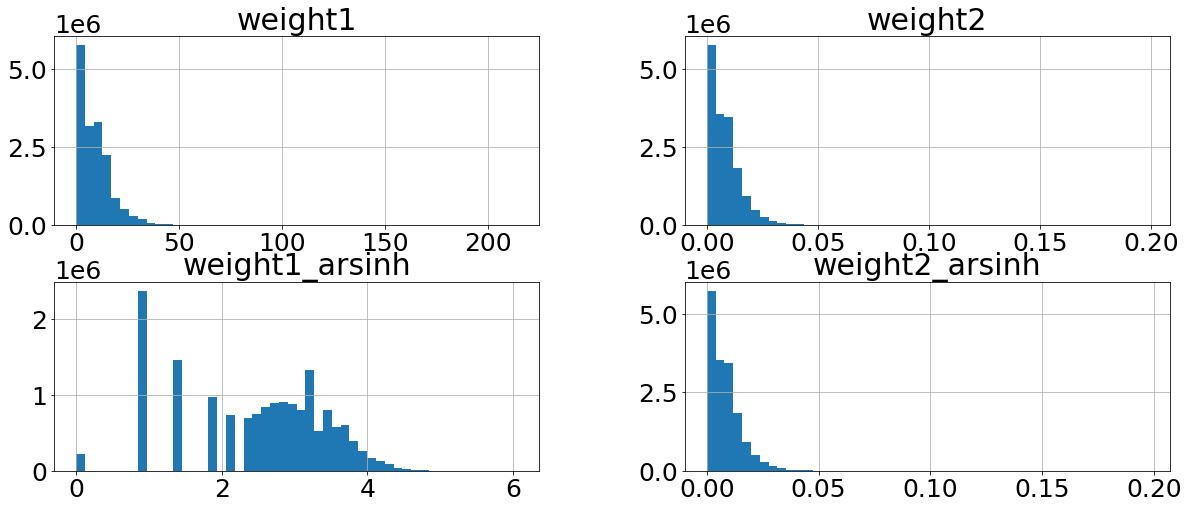

In [26]:
aly_edge_feat_cols += ['weight1_arsinh', 'weight2_arsinh']

train_edge_df[aly_edge_feat_cols].hist(bins=50,figsize=(20,8))

In [27]:
from sklearn import preprocessing

# Standardization edge features
std_scaler = preprocessing.StandardScaler().fit(train_edge_df[aly_edge_feat_cols])
norm_num_feat_cols = [f'{col_name}-norm' for col_name in aly_edge_feat_cols]

norm_train_vals = std_scaler.transform(train_edge_df[aly_edge_feat_cols])
norm_train_edge_df = pd.DataFrame(norm_train_vals, columns=norm_num_feat_cols, index=train_edge_df.index)
train_edge_df = pd.concat([train_edge_df, norm_train_edge_df], axis=1)

In [28]:
train_edge_df

,from,to,weight1,weight2,sim,weight1_arsinh,weight2_arsinh,weight1-norm,weight2-norm,weight1_arsinh-norm,weight2_arsinh-norm
0,1724,3,24,0.019774,10000,3.871635,0.019772,1.939023,1.668456,1.387783,1.668596
1,1724,1725,11,0.009048,10000,3.093102,0.009048,0.258924,0.135915,0.608207,0.135975
2,1725,1,1,0.000827,10000,0.881374,0.000827,-1.033461,-1.038866,-1.606488,-1.038979
3,1725,1726,7,0.006317,10000,2.644121,0.006317,-0.258030,-0.254434,0.158623,-0.254426
4,1726,2,1,0.000840,10000,0.881374,0.000840,-1.033461,-1.036973,-1.606488,-1.037086
...,...,...,...,...,...,...,...,...,...,...,...
20665237,3380,3382,9,0.007972,9997,2.893444,0.007972,0.000447,-0.017846,0.408281,-0.017806
20665238,3382,18,1,0.000841,9997,0.881374,0.000841,-1.033461,-1.036876,-1.606488,-1.036989
20665239,3382,3383,4,0.003696,9997,2.094713,0.003696,-0.645745,-0.628839,-0.391522,-0.628887
20665240,3383,53,17,0.013601,9997,3.527224,0.013601,1.034354,0.786502,1.042911,0.786624


In [29]:
print(std_scaler.mean_, std_scaler.scale_)

[8.99654401e+00 8.09720537e-03 2.48571016e+00 8.09682127e-03] [7.73763675e+00 6.99834891e-03 9.98660807e-01 6.99721967e-03]


In [30]:
prep_dict = {}
prep_dict['feat'] = aly_edge_feat_cols
prep_dict['mean'] = std_scaler.mean_
prep_dict['std'] = std_scaler.scale_
prep_dict

{'feat': ['weight1', 'weight2', 'weight1_arsinh', 'weight2_arsinh'],
 'mean': array([8.99654401e+00, 8.09720537e-03, 2.48571016e+00, 8.09682127e-03]),
 'std': array([7.73763675e+00, 6.99834891e-03, 9.98660807e-01, 6.99721967e-03])}

In [31]:
np.save("prep_edge-TB.npy",prep_dict)

In [32]:
# Update the feat_dict.json
import json

js_f = osp.join('./feat_dict-TB.json')

with open(js_f, 'r') as infile:
    feat_dict = json.load(infile)

feat_dict['raw_edge_feats'] = aly_edge_feat_cols
feat_dict['norm_edge_feats'] = [f'{org_feat_col}-norm' for org_feat_col in aly_edge_feat_cols]
feat_dict['norm_edge_feats_arsinh'] = [f'{feat_col}-norm' for feat_col in aly_edge_feat_cols[2:]]

node_feat_cols = feat_dict['norm_onehot_feats']
raw_edge_feat_cols = feat_dict['raw_edge_feats']
norm_edge_feat_cols = feat_dict['norm_edge_feats']

print(f'Inputs: {len(node_feat_cols)}, {node_feat_cols}')
label_feat_col = 'dynamic_cat'

with open(js_f, 'w') as outfile:
    json.dump(feat_dict, outfile, sort_keys=True, indent=4)

Inputs: 16, ['oster-norm', 'PD-norm', 'abs_growth_rate-norm', 'fraction_time_growth-norm', 'r_max-norm', 'cherries-norm', 'BLD-norm', 'new_R0-norm', 'ltt_shape_cat_0', 'ltt_shape_cat_1', 'ltt_shape_cat_2', 'ltt_shape_cat_3', 'gamma_cat_0', 'gamma_cat_1', 'gamma_cat_2', 'gamma_cat_3']


In [33]:
test_edge_df.loc[:, 'weight1_arsinh'] = np.arcsinh(test_edge_df['weight1'])
test_edge_df.loc[:, 'weight2_arsinh'] = np.arcsinh(test_edge_df['weight2'])
test_edge_df

/home/chaoyue/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,from,to,weight1,weight2,sim,weight1_arsinh,weight2_arsinh
13389,1685,1686,2,0.001737,1004,1.443635,0.001737
13390,1686,2,11,0.009243,1004,3.093102,0.009243
13391,1686,1687,14,0.011219,1004,3.333478,0.011219
13392,1687,1688,1,0.000868,1004,0.881374,0.000868
13393,1688,1689,11,0.008952,1004,3.093102,0.008952
...,...,...,...,...,...,...,...
20671950,3449,1387,14,0.011984,99,3.333478,0.011984
20671951,3449,1820,14,0.013192,99,3.333478,0.013192
20671952,3431,3450,40,0.039586,99,4.382183,0.039575
20671953,3450,146,2,0.001946,99,1.443635,0.001946


In [34]:
norm_test_vals = std_scaler.transform(test_edge_df[raw_edge_feat_cols])
norm_test_edge_df = pd.DataFrame(norm_test_vals, columns=norm_edge_feat_cols, index=test_edge_df.index)
test_edge_df = pd.concat([test_edge_df, norm_test_edge_df], axis=1)

In [35]:
test_edge_df.head()

,from,to,weight1,weight2,sim,weight1_arsinh,weight2_arsinh,weight1-norm,weight2-norm,weight1_arsinh-norm,weight2_arsinh-norm
13389,1685,1686,2,0.001737,1004,1.443635,0.001737,-0.904222,-0.908805,-1.043472,-0.908897
13390,1686,2,11,0.009243,1004,3.093102,0.009243,0.258924,0.163706,0.608207,0.163768
13391,1686,1687,14,0.011219,1004,3.333478,0.011219,0.646639,0.446065,0.848904,0.446158
13392,1687,1688,1,0.000868,1004,0.881374,0.000868,-1.033461,-1.033044,-1.606488,-1.033156
13393,1688,1689,11,0.008952,1004,3.093102,0.008952,0.258924,0.122149,0.608207,0.122207


array([[<AxesSubplot:title={'center':'weight1-norm'}>,
        <AxesSubplot:title={'center':'weight2-norm'}>],
       [<AxesSubplot:title={'center':'weight1_arsinh-norm'}>,
        <AxesSubplot:title={'center':'weight2_arsinh-norm'}>]],
      dtype=object)

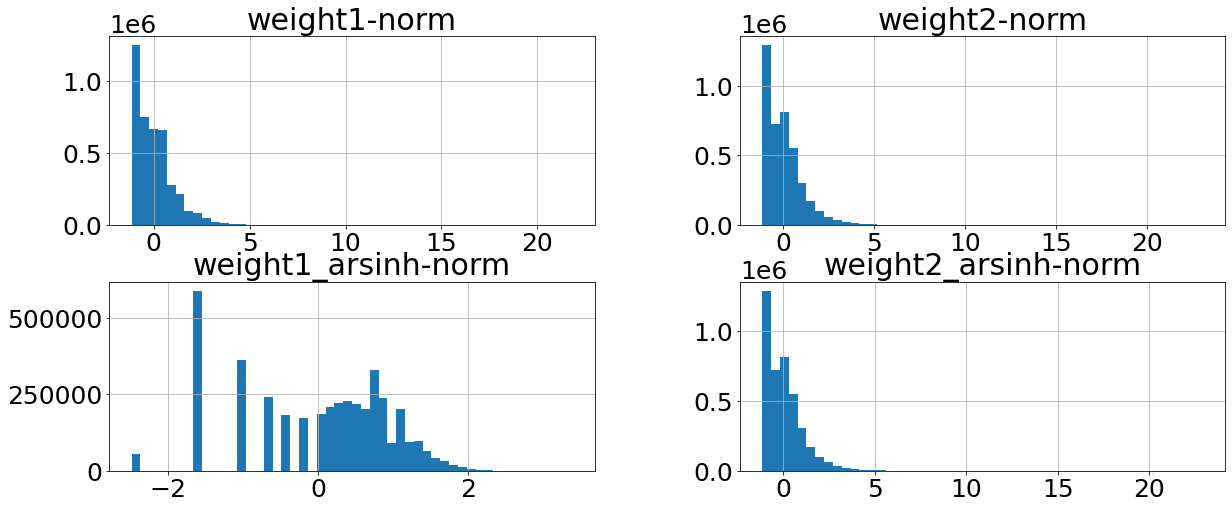

In [36]:
test_edge_df[norm_edge_feat_cols].hist(bins=50,figsize=(20,8))

/home/chaoyue/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


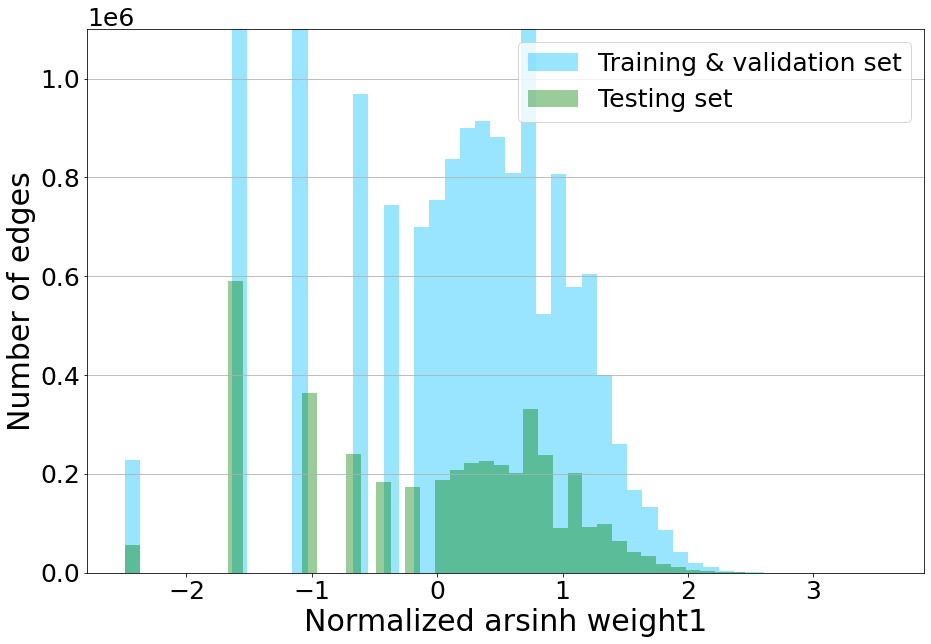

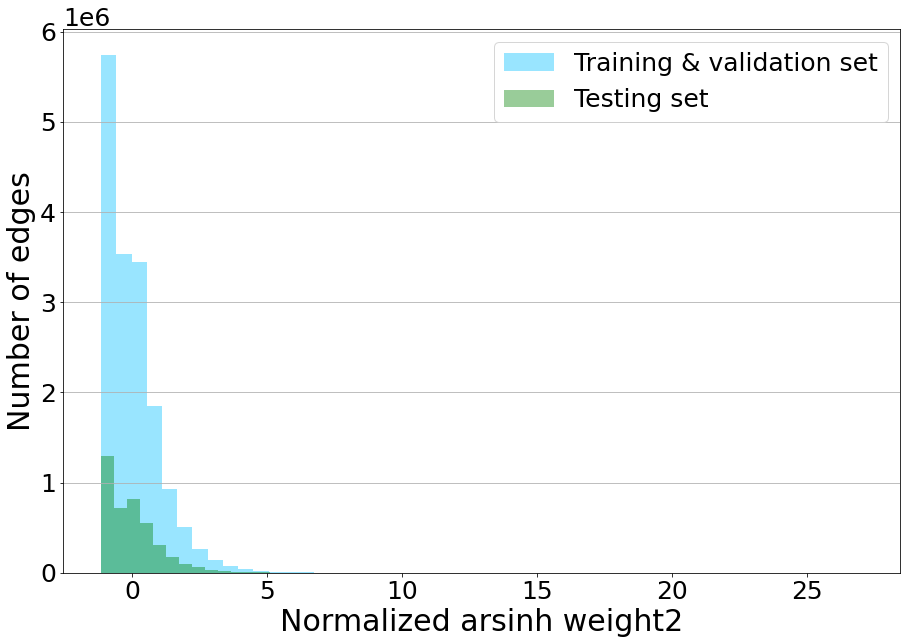

In [37]:
i=1
for feat in norm_edge_feat_cols[2:]:
    fig = plt.figure(figsize=[15,10])
    plt.rcParams.update({'font.size': 25})
    ax1 = fig.add_subplot(111)
    #ax2 = ax1.twinx()
    sns.distplot(train_edge_df[feat],hist=True,kde=False,rug=False,color='#00BFFF',label='Train & Validation Set',ax=ax1)
    sns.distplot(test_edge_df[feat],hist=True,kde=False,rug=False,color='green',label='Test Set',ax=ax1)
    if i == 1:
        ax1.set(ylim=(0,1100000))
        i=0
    ax1.axes.set_ylabel("Number of edges",fontsize=30)
    ax1.axes.set_xlabel(f"Normalized arsinh {feat[0:7]}",fontsize=30)
    plt.grid(axis = "y")
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    ax1.legend(['Training & validation set','Testing set'],fontsize=25,loc=1)
    #fig.savefig(f"../paper/edge_dist/{feat}.svg",dpi=600,format='svg')

In [38]:
train_ids, valid_ids = train_test_split(train_ids, test_size=0.25)
print(f"Train: {len(train_ids)}, Valid: {len(valid_ids)}")
print(valid_ids[:10])

Train: 3853, Valid: 1285
[7606. 2764. 3664. 4749. 6504. 7770.   70. 9559. 1131. 8361.]


In [39]:
train_full_df = train_edge_df[train_edge_df['sim'].isin(train_ids)]
valid_full_df = train_edge_df[train_edge_df['sim'].isin(valid_ids)]

print(f'Train edge: {train_full_df.shape[0]}')
print(f'Valid edge: {valid_full_df.shape[0]}')
train_full_df.head()

Train edge: 12414044
Valid edge: 4151089


,from,to,weight1,weight2,sim,weight1_arsinh,weight2_arsinh,weight1-norm,weight2-norm,weight1_arsinh-norm,weight2_arsinh-norm
0,1724,3,24,0.019774,10000,3.871635,0.019772,1.939023,1.668456,1.387783,1.668596
1,1724,1725,11,0.009048,10000,3.093102,0.009048,0.258924,0.135915,0.608207,0.135975
2,1725,1,1,0.000827,10000,0.881374,0.000827,-1.033461,-1.038866,-1.606488,-1.038979
3,1725,1726,7,0.006317,10000,2.644121,0.006317,-0.258030,-0.254434,0.158623,-0.254426
4,1726,2,1,0.000840,10000,0.881374,0.000840,-1.033461,-1.036973,-1.606488,-1.037086


In [40]:
# Save the train/test to the disk

train_full_df.to_csv(f'{split_folder}/train_edge.csv', index=False)
valid_full_df.to_csv(f'{split_folder}/valid_edge.csv', index=False)
test_edge_df.to_csv(f'{split_folder}/test_edge.csv', index=False)

### Tree distribution for train & test sets

In [41]:
from collections import defaultdict
train_dist = defaultdict(list)
all_bg = []
for tree_id in train_ids:
    onetree_node_df = node_df[node_df['sim'] == tree_id] 
    num_nodes = onetree_node_df.shape[0]
    if num_nodes == 0:
        all_bg.append(tree_id)
        continue
    train_dist['sim'].append(tree_id)
    train_dist['num_nodes'].append(num_nodes)
    
    num_background_nodes = onetree_node_df[onetree_node_df['cluster_id']=='Background'].shape[0]
    tree_dist_dict['num_background_nodes'].append(num_background_nodes)
    tree_dist_dict[f'rat_background_nodes'].append(num_background_nodes / num_nodes)
    
    for label in ['static', 'growth', 'decay']:
        num_label_nodes = onetree_node_df[onetree_node_df['dynamic']==label].shape[0]
        train_dist[f'num_{label}_nodes'].append(num_label_nodes)
        train_dist[f'ratio_{label}_nodes'].append(num_label_nodes / num_nodes)  
    onetree_edge_df = edge_df[edge_df['sim'] == tree_id]
    # print(onetree_edge_df.shape)
    train_dist['num_edges'].append(onetree_edge_df.shape[0])
    
train_dist_df = pd.DataFrame.from_dict(train_dist)

In [42]:
all_bg

[]

array([[<AxesSubplot:title={'center':'sim'}>,
        <AxesSubplot:title={'center':'num_nodes'}>,
        <AxesSubplot:title={'center':'num_static_nodes'}>],
       [<AxesSubplot:title={'center':'ratio_static_nodes'}>,
        <AxesSubplot:title={'center':'num_growth_nodes'}>,
        <AxesSubplot:title={'center':'ratio_growth_nodes'}>],
       [<AxesSubplot:title={'center':'num_decay_nodes'}>,
        <AxesSubplot:title={'center':'ratio_decay_nodes'}>,
        <AxesSubplot:title={'center':'num_edges'}>]], dtype=object)

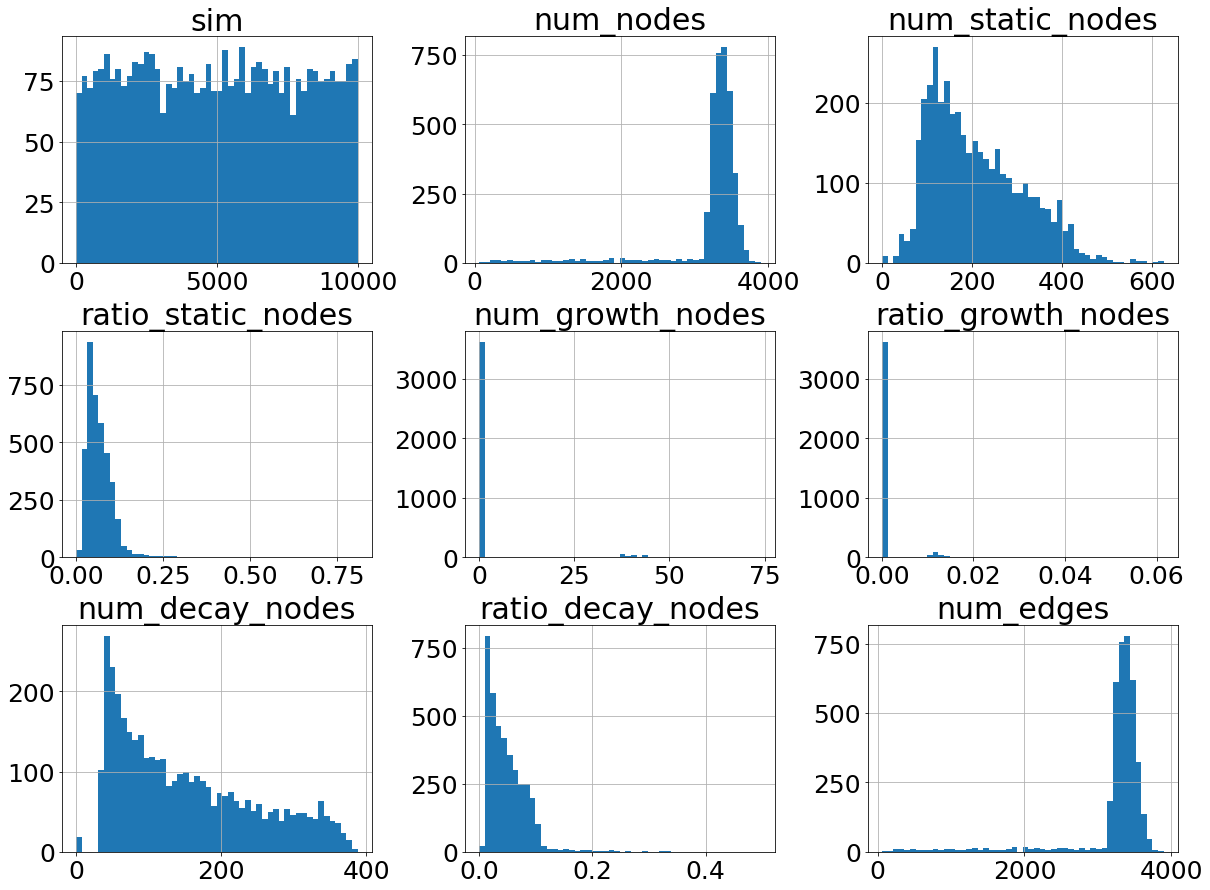

In [43]:
train_dist_df.hist(bins=50,figsize=(20,15))

In [44]:
train_dist_df

,sim,num_nodes,num_static_nodes,ratio_static_nodes,num_growth_nodes,ratio_growth_nodes,num_decay_nodes,ratio_decay_nodes,num_edges
0,5405.0,3569,375,0.105071,0,0.0,273,0.076492,3568
1,4629.0,3316,226,0.068154,0,0.0,43,0.012967,3315
2,2055.0,3587,443,0.123502,0,0.0,128,0.035684,3586
3,2963.0,3481,344,0.098822,0,0.0,127,0.036484,3480
4,6412.0,3227,112,0.034707,0,0.0,46,0.014255,3226
...,...,...,...,...,...,...,...,...,...
3848,8833.0,3202,114,0.035603,0,0.0,74,0.023111,3201
3849,4968.0,3516,278,0.079067,0,0.0,228,0.064846,3515
3850,1134.0,3367,260,0.077220,0,0.0,107,0.031779,3366
3851,5981.0,3363,155,0.046090,0,0.0,114,0.033898,3362


In [45]:
from collections import defaultdict
test_dist = defaultdict(list)
for tree_id in test_ids:
    test_dist['sim'].append(tree_id)
    onetree_node_df = node_df[node_df['sim'] == tree_id] 
    num_nodes = onetree_node_df.shape[0]
    test_dist['num_nodes'].append(num_nodes)
    
    #num_background_nodes = onetree_node_df[onetree_node_df['cluster_id']=='Background'].shape[0]
    #tree_dist_dict['num_background_nodes'].append(num_background_nodes)
    #tree_dist_dict[f'rat_background_nodes'].append(num_background_nodes / num_nodes)
    
    for label in ['static', 'growth', 'decay']:
        num_label_nodes = onetree_node_df[onetree_node_df['dynamic']==label].shape[0]
        test_dist[f'num_{label}_nodes'].append(num_label_nodes)
        test_dist[f'ratio_{label}_nodes'].append(num_label_nodes / num_nodes)
        
    onetree_edge_df = edge_df[edge_df['sim'] == tree_id]
    # print(onetree_edge_df.shape)
    test_dist['num_edges'].append(onetree_edge_df.shape[0])
    
test_dist_df = pd.DataFrame.from_dict(test_dist)

array([[<AxesSubplot:title={'center':'sim'}>,
        <AxesSubplot:title={'center':'num_nodes'}>,
        <AxesSubplot:title={'center':'num_static_nodes'}>],
       [<AxesSubplot:title={'center':'ratio_static_nodes'}>,
        <AxesSubplot:title={'center':'num_growth_nodes'}>,
        <AxesSubplot:title={'center':'ratio_growth_nodes'}>],
       [<AxesSubplot:title={'center':'num_decay_nodes'}>,
        <AxesSubplot:title={'center':'ratio_decay_nodes'}>,
        <AxesSubplot:title={'center':'num_edges'}>]], dtype=object)

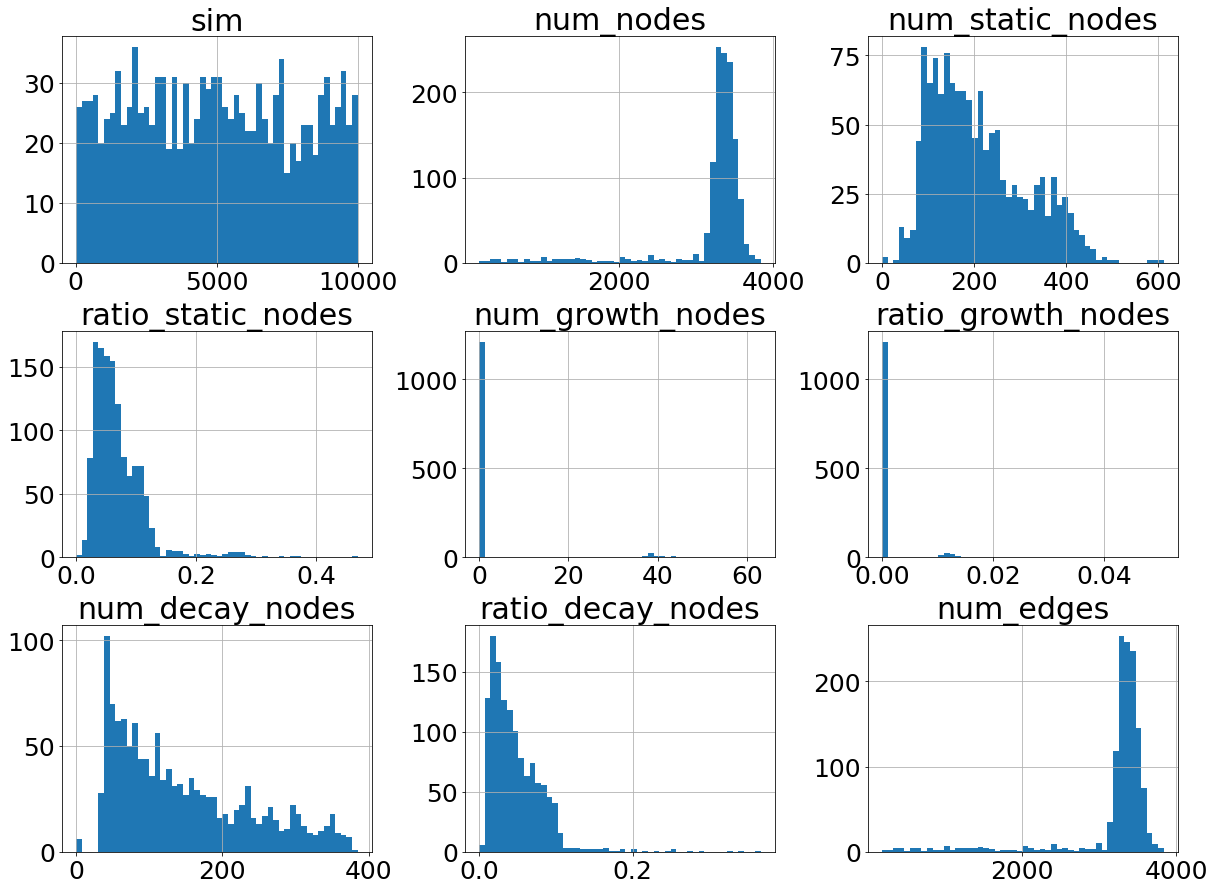

In [46]:
test_dist_df.hist(bins=50,figsize=(20,15))

In [47]:
test_dist_df.columns.values[1:]

array(['num_nodes', 'num_static_nodes', 'ratio_static_nodes',
       'num_growth_nodes', 'ratio_growth_nodes', 'num_decay_nodes',
       'ratio_decay_nodes', 'num_edges'], dtype=object)

/home/chaoyue/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


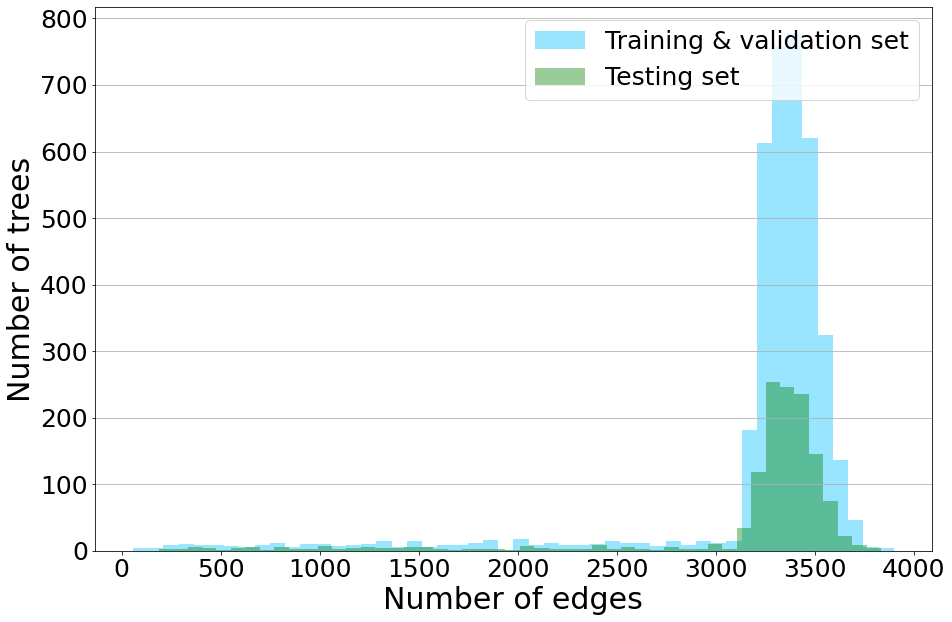

In [48]:
i = 7
feat = test_dist_df.columns.values[1:][i]
fig = plt.figure(figsize=[15,10])
plt.rcParams.update({'font.size': 25})
ax1 = fig.add_subplot(111)
#ax2 = ax1.twinx()
sns.distplot(train_dist_df[feat],hist=True,kde=False,rug=False,color='#00BFFF',label='Train & Validation Set',ax=ax1)
sns.distplot(test_dist_df[feat],hist=True,kde=False,rug=False,color='green',label='Test Set',ax=ax1)
#ax1.set(ylim=(0,1000))
ax1.axes.set_ylabel("Number of trees",fontsize=30)
ax1.axes.set_xlabel("Number of edges",fontsize=30)
plt.grid(axis = "y")
ax1.legend(['Training & validation set','Testing set'],fontsize=25,loc=1)
#fig.savefig(f"../paper/tree_feat/{feat}.svg",dpi=600,format='svg')

### Build a tree with DGL

In [51]:
import networkx as nx
import matplotlib.pyplot as plt

In [52]:
# Load a tree from the train data
train_node_df = pd.read_csv(f'{split_folder}/train.csv')
vis_tree_id = train_ids[0]
print(vis_tree_id)

5405.0


In [53]:
onetree_node_df = train_node_df[train_node_df['sim'] == vis_tree_id] 
onetree_edge_df = train_edge_df[edge_df['sim'] == vis_tree_id]

/tmp/ipykernel_32458/2451865035.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  onetree_edge_df = train_edge_df[edge_df['sim'] == vis_tree_id]


In [54]:
onetree_node_df.head()

,sim,cluster_id,state,dynamic,dynamic_rparam,v_sampling_fraction,v_cluster_size,v_fraction_state,v_timespan,gamma,oster,PD,R0,abs_growth_rate,fraction_time_growth,r_max,ltt_shape,cherries,BLD,date,node,gamma_bin,gamma_cat,ltt_shape_cat,dynamic_cat,gamma_cat_0,gamma_cat_1,gamma_cat_2,gamma_cat_3,ltt_shape_cat_0,ltt_shape_cat_1,ltt_shape_cat_2,ltt_shape_cat_3,new_R0,v_sampling_fraction-norm,v_cluster_size-norm,v_timespan-norm,oster-norm,PD-norm,abs_growth_rate-norm,fraction_time_growth-norm,r_max-norm,cherries-norm,BLD-norm,new_R0-norm
685900,5405.0,c1,B,static,0.0,0.872697,44.0,1.0,111.0,52.246881,111.004883,522.0,1.651867,53.211389,0.0,45.69029,convex,0.263158,0.0,2020-04-08,1937.0,"(-20.742, inf]",2,2,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.651867,1.182087,-0.719233,1.458313,1.458392,-0.628427,-0.011003,-1.249714,-0.027158,-0.327077,-0.51624,-0.394222
685901,5405.0,c1,B,static,0.0,0.872697,44.0,1.0,111.0,52.246881,111.004883,522.0,1.651867,53.211389,0.0,45.69029,convex,0.263158,0.0,2020-04-07,1936.0,"(-20.742, inf]",2,2,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.651867,1.182087,-0.719233,1.458313,1.458392,-0.628427,-0.011003,-1.249714,-0.027158,-0.327077,-0.51624,-0.394222
685902,5405.0,c1,B,static,0.0,0.872697,44.0,1.0,111.0,52.246881,111.004883,522.0,1.651867,53.211389,0.0,45.69029,convex,0.263158,0.0,2020-05-26,125.0,"(-20.742, inf]",2,2,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.651867,1.182087,-0.719233,1.458313,1.458392,-0.628427,-0.011003,-1.249714,-0.027158,-0.327077,-0.51624,-0.394222
685903,5405.0,c1,B,static,0.0,0.872697,44.0,1.0,111.0,52.246881,111.004883,522.0,1.651867,53.211389,0.0,45.69029,convex,0.263158,0.0,2020-04-24,1938.0,"(-20.742, inf]",2,2,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.651867,1.182087,-0.719233,1.458313,1.458392,-0.628427,-0.011003,-1.249714,-0.027158,-0.327077,-0.51624,-0.394222
685904,5405.0,c1,B,static,0.0,0.872697,44.0,1.0,111.0,52.246881,111.004883,522.0,1.651867,53.211389,0.0,45.69029,convex,0.263158,0.0,2020-03-27,29.0,"(-20.742, inf]",2,2,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.651867,1.182087,-0.719233,1.458313,1.458392,-0.628427,-0.011003,-1.249714,-0.027158,-0.327077,-0.51624,-0.394222


In [55]:
onetree_edge_df

,from,to,weight1,weight2,sim,weight1_arsinh,weight2_arsinh,weight1-norm,weight2-norm,weight1_arsinh-norm,weight2_arsinh-norm
10066021,1911,1,1,0.000836,5405,0.881374,0.000836,-1.033461,-1.037620,-1.606488,-1.037732
10066022,1911,1912,24,0.020414,5405,3.871635,0.020413,1.939023,1.759957,1.387783,1.760093
10066023,1912,1913,1,0.000850,5405,0.881374,0.000850,-1.033461,-1.035592,-1.606488,-1.035704
10066024,1913,4,10,0.009050,5405,2.998223,0.009050,0.129685,0.136180,0.513200,0.136239
10066025,1913,1914,3,0.002441,5405,1.818446,0.002441,-0.774984,-0.808172,-0.668158,-0.808248
...,...,...,...,...,...,...,...,...,...,...,...
10069584,3568,36,2,0.001781,5405,1.443635,0.001781,-0.904222,-0.902588,-1.043472,-0.902679
10069585,3568,42,7,0.006671,5405,2.644121,0.006671,-0.258030,-0.203722,0.158623,-0.203707
10069586,1947,3569,10,0.008822,5405,2.998223,0.008822,0.129685,0.103612,0.513200,0.103668
10069587,3569,15,2,0.001729,5405,1.443635,0.001729,-0.904222,-0.910004,-1.043472,-0.910096


In [56]:
pip install pygraphviz==1.5

  Using cached pygraphviz-1.5.zip (117 kB)
  ERROR: Command errored out with exit status 1:
   command: /home/chaoyue/anaconda3/bin/python -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-w4_8vew4/pygraphviz_d03e9824f5b74897a34ba89ce42eb250/setup.py'"'"'; __file__='"'"'/tmp/pip-install-w4_8vew4/pygraphviz_d03e9824f5b74897a34ba89ce42eb250/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /tmp/pip-wheel-b2rp14hx
       cwd: /tmp/pip-install-w4_8vew4/pygraphviz_d03e9824f5b74897a34ba89ce42eb250/
  Complete output (58 lines):
  /home/chaoyue/anaconda3/lib/python3.8/site-packages/setuptools/dist.py:717: UserWarning: Usage of dash-separated 'build-requires' will not be supported in future versions. Please use the underscore

Note: you may need to restart the kernel to use updated packages.


In [57]:
import dgl
import networkx as nx
import torch
import pygraphviz as pgv

Using backend: pytorch


ModuleNotFoundError: No module named 'pygraphviz'

In [ ]:
src_ids = torch.tensor(onetree_edge_df['from'].values)
dst_ids = torch.tensor(onetree_edge_df['to'].values)

# Note: the start idx of the node is 0 not 1. But simulation node starts with 1
# We need substract 1 to the node idx for edges and nodes files.
src_ids -= 1
dst_ids -= 1

In [ ]:
g = dgl.graph((src_ids, dst_ids))
nx_g = dgl.to_networkx(g)

print(f'Nodes: {g.number_of_nodes()}')
print(f'Edges: {g.number_of_edges()}')

In [ ]:
g.nodes()

### Assign features to nodes

In [ ]:
sorted_onetree_node_df = onetree_node_df.sort_values(by='node')
print(sorted_onetree_node_df['node'].values)
n_nodes = sorted_onetree_node_df.shape[0]
sorted_onetree_node_df.tail()

In [ ]:
# Now using heatmaps
plt.figure(figsize=(15,8))
sns.heatmap(sorted_onetree_node_df.isnull(), cbar=False)

In [ ]:
# Next is to use the missingno library to analyze the missing values
import missingno as msno 

msno.bar(sorted_onetree_node_df,labels=True,fontsize=10) 

In [ ]:
g.ndata['feat'] = torch.tensor(sorted_onetree_node_df[node_feat_cols].values)
g.ndata['label'] = torch.tensor(sorted_onetree_node_df[label_feat_col].values)

for i in range(n_nodes):
    if not torch.all(torch.isnan(g.ndata['feat'][i])):
        print(f"NodeID: {i+1}, {g.ndata['feat'][i]}, {g.ndata['label'][i]}")
        break

### Assign features to edges

In [ ]:
g.edges()

In [ ]:
# The edge features are assigned to the edata according to the edge order, not considerring the src and dst
g.edata['feat'] = torch.tensor(onetree_edge_df[norm_edge_feat_cols].values)
g.edata['feat'][0]

In [ ]:
plt.figure(figsize=(20, 15))
color_map = []
node_labels = g.ndata['label'].numpy()
label_counter = defaultdict(lambda: 0)

for node_id in nx_g:
    node_label = node_labels[node_id]
    if np.isnan(node_label):
        label_counter['bg'] += 1
        color_map.append('gray')
    else:
        if node_label == 0:  # decay
            color_map.append('blue')
        elif node_label == 1:   # growth
            color_map.append('green')
        elif node_label == 2:   # static
            color_map.append('red')
        label_counter[node_label] += 1
            
print(label_counter)
pos = nx.nx_agraph.graphviz_layout(nx_g, prog='dot')
nx.draw(nx_g, pos, with_labels=False, node_size=30, node_color=color_map, alpha=.7, arrowsize=1)